[1] Processed: a.jpg
  → Leaf count: 1
  → Total leaf area: 32818 pixels
  → Individual leaf areas:


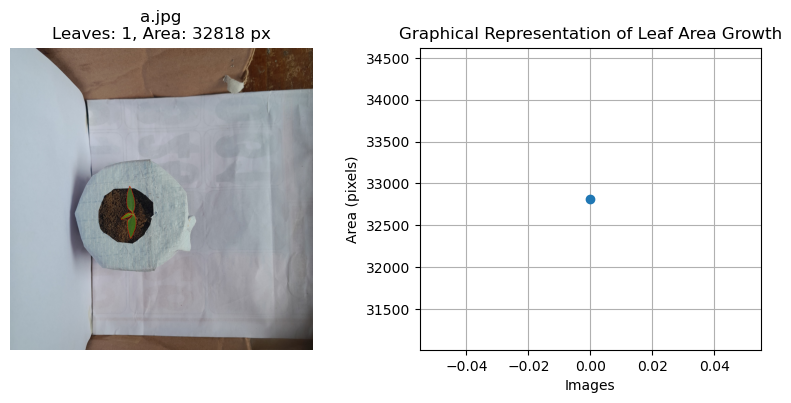

[2] Processed: b.jpg
  → Leaf count: 1
  → Total leaf area: 33742 pixels
  → Individual leaf areas:


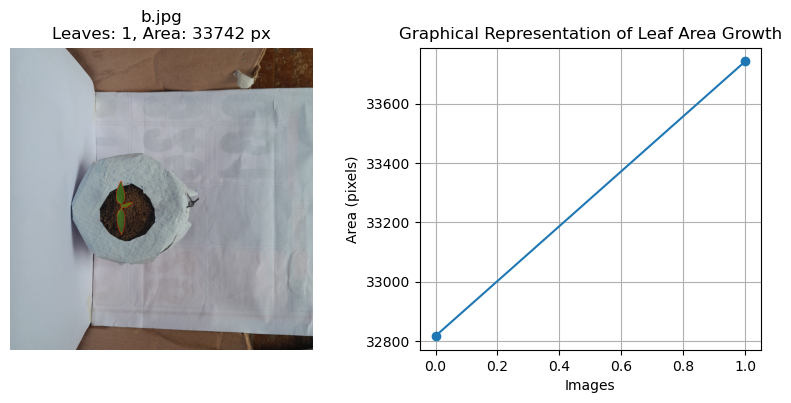

[3] Processed: c.jpg
  → Leaf count: 1
  → Total leaf area: 36158 pixels
  → Individual leaf areas:


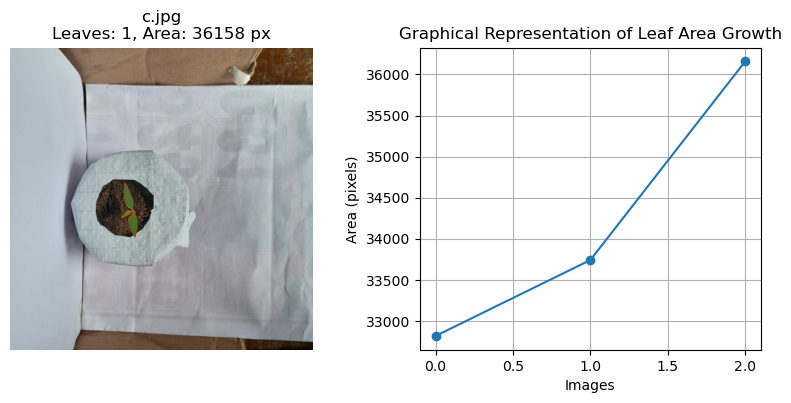

[4] Processed: d.jpg
  → Leaf count: 2
  → Total leaf area: 35621 pixels
  → Individual leaf areas:


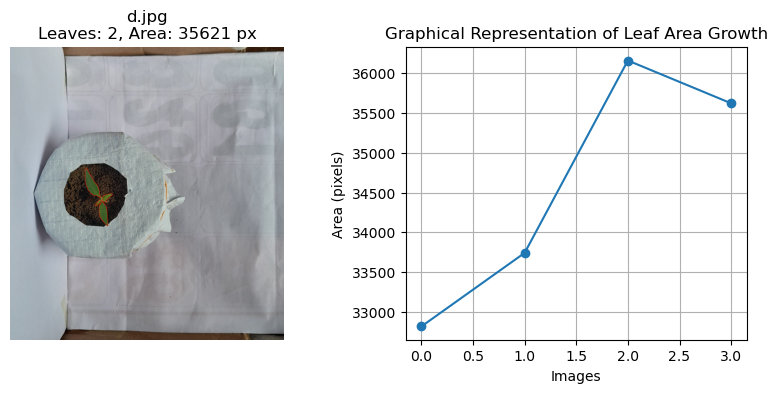

[5] Processed: e.jpg
  → Leaf count: 2
  → Total leaf area: 37581 pixels
  → Individual leaf areas:


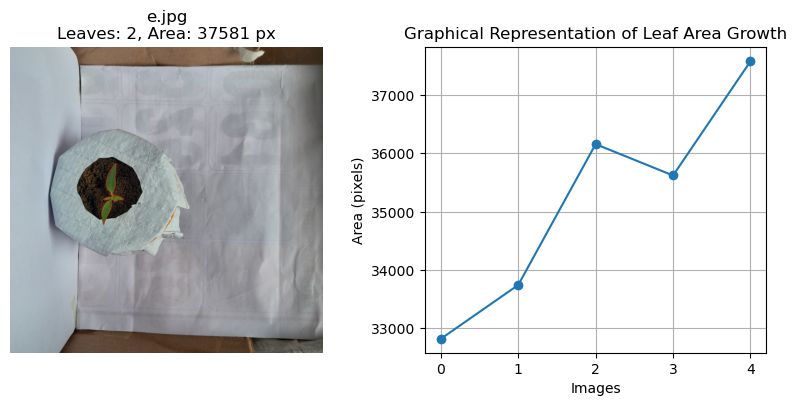

[6] Processed: f.jpg
  → Leaf count: 2
  → Total leaf area: 37581 pixels
  → Individual leaf areas:


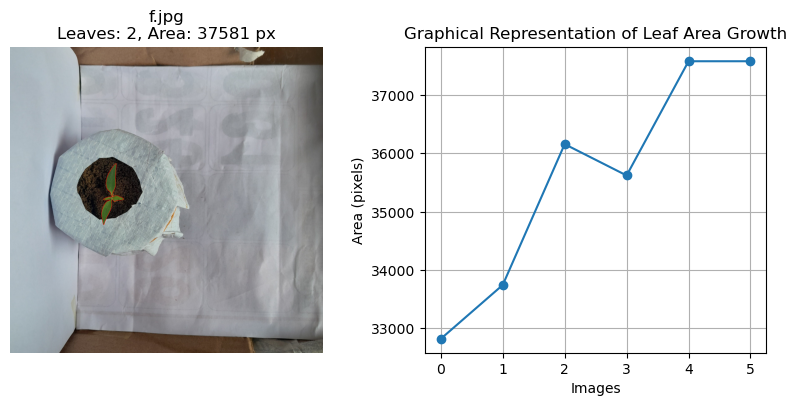

[7] Processed: g.jpg
  → Leaf count: 1
  → Total leaf area: 53371 pixels
  → Individual leaf areas:


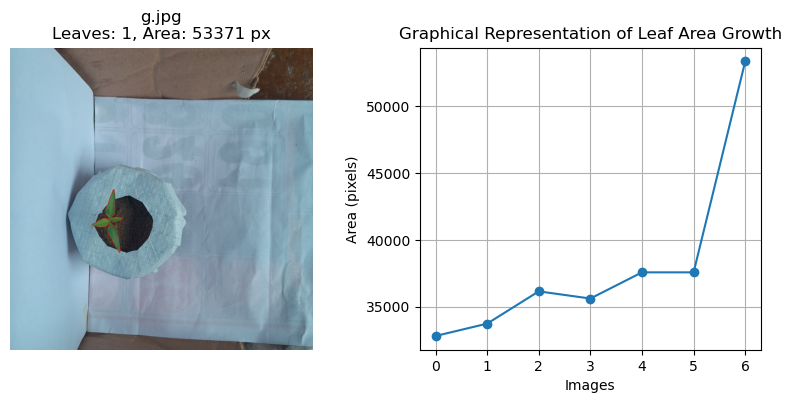

[8] Processed: h.jpg
  → Leaf count: 1
  → Total leaf area: 53309 pixels
  → Individual leaf areas:


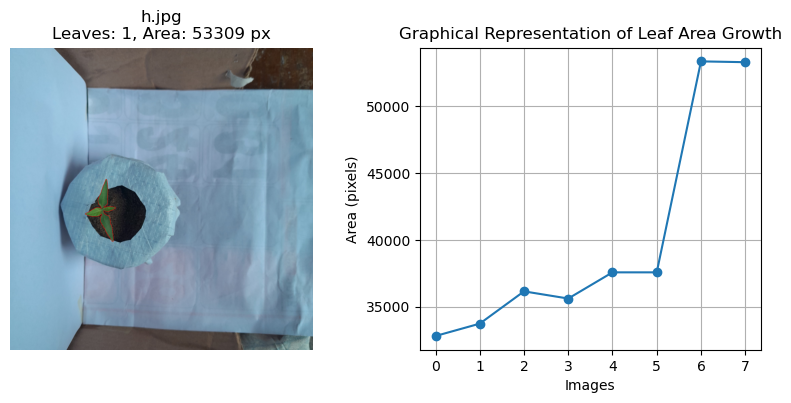

[9] Processed: i.jpg
  → Leaf count: 1
  → Total leaf area: 53309 pixels
  → Individual leaf areas:


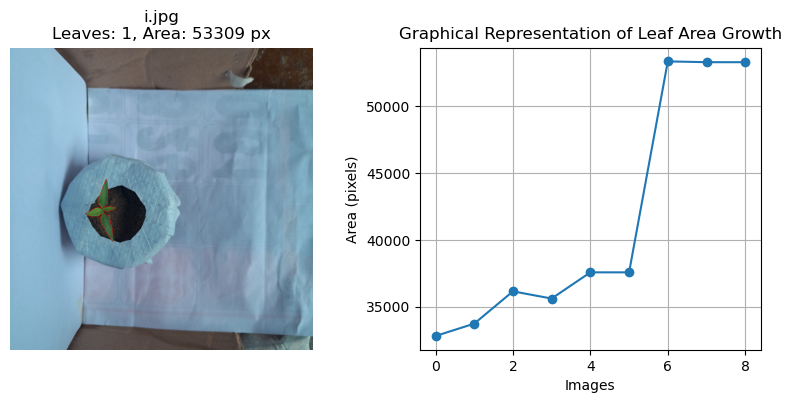

[10] Processed: j.jpg
  → Leaf count: 2
  → Total leaf area: 51455 pixels
  → Individual leaf areas:


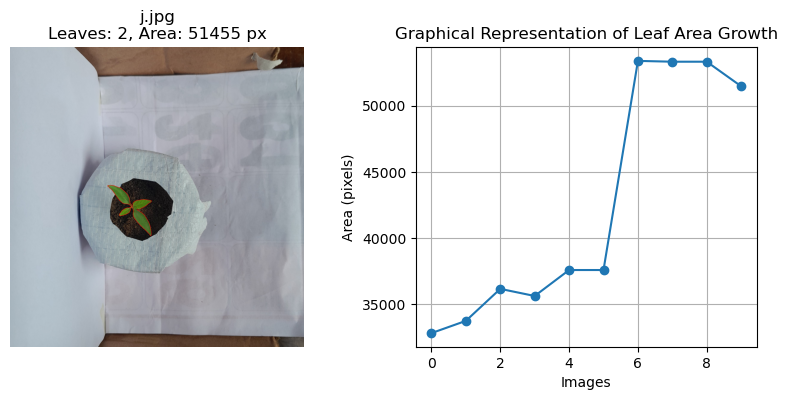

[11] Processed: k.jpg
  → Leaf count: 1
  → Total leaf area: 87622 pixels
  → Individual leaf areas:


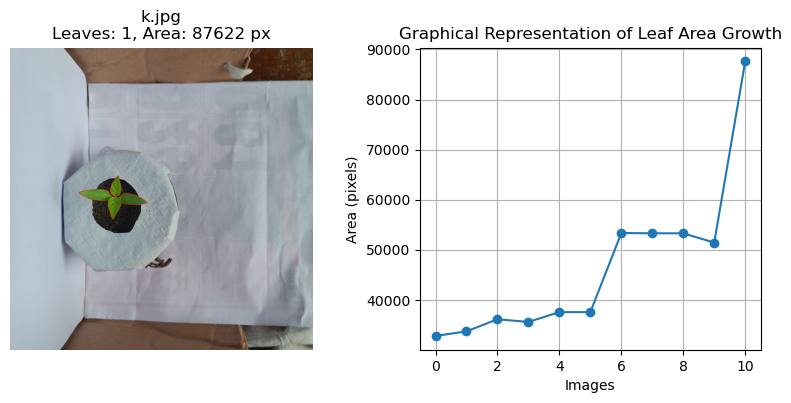

[12] Processed: l.jpg
  → Leaf count: 1
  → Total leaf area: 91711 pixels
  → Individual leaf areas:


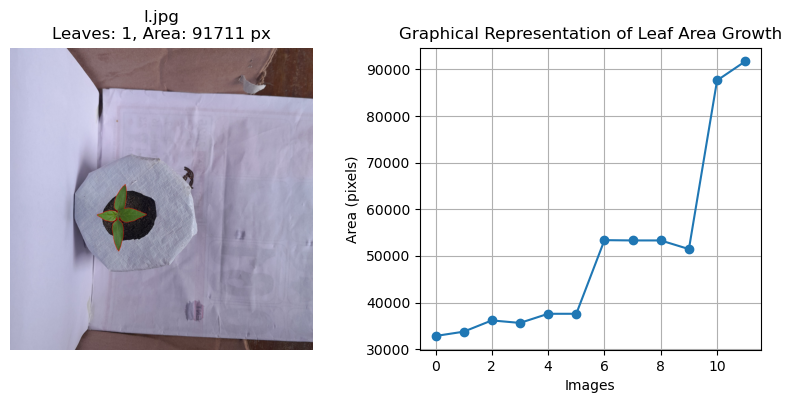

[13] Processed: m.jpg
  → Leaf count: 1
  → Total leaf area: 110612 pixels
  → Individual leaf areas:


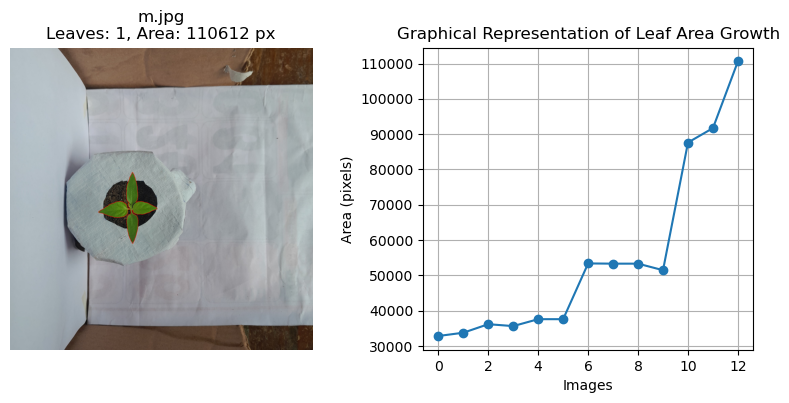

[14] Processed: n.jpg
  → Leaf count: 4
  → Total leaf area: 111231 pixels
  → Individual leaf areas:


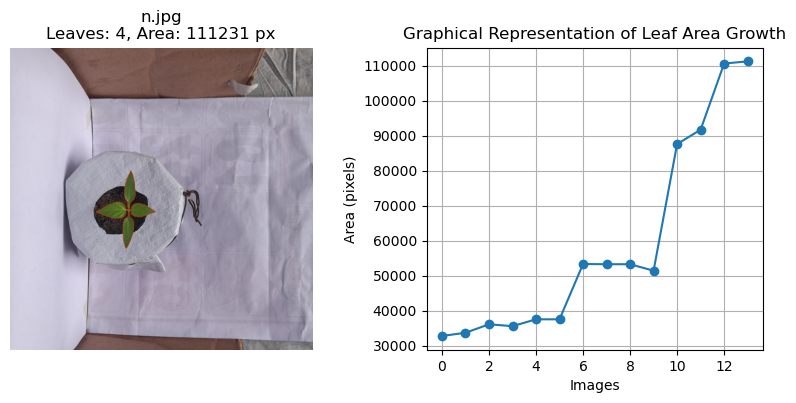

[15] Processed: o.jpg
  → Leaf count: 1
  → Total leaf area: 111757 pixels
  → Individual leaf areas:


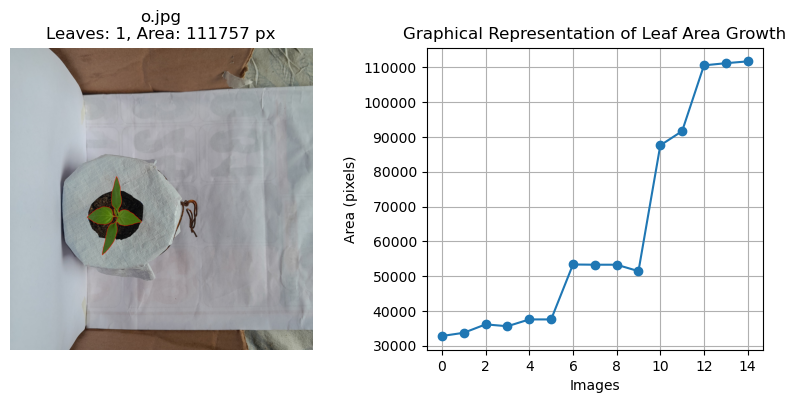

[16] Processed: p.jpg
  → Leaf count: 1
  → Total leaf area: 112962 pixels
  → Individual leaf areas:


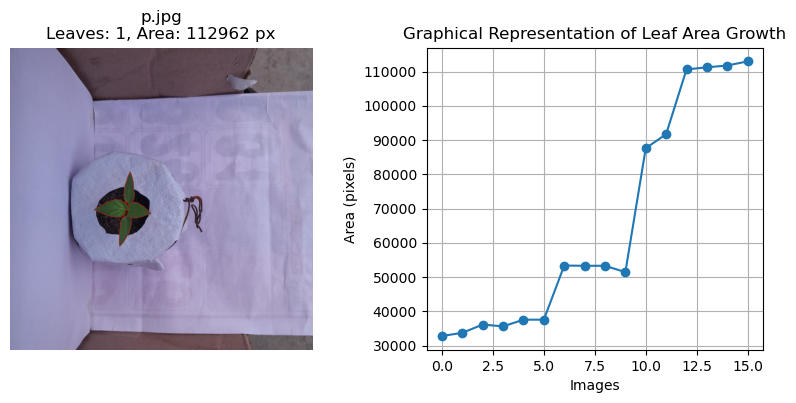

[17] Processed: q.jpg
  → Leaf count: 1
  → Total leaf area: 144432 pixels
  → Individual leaf areas:


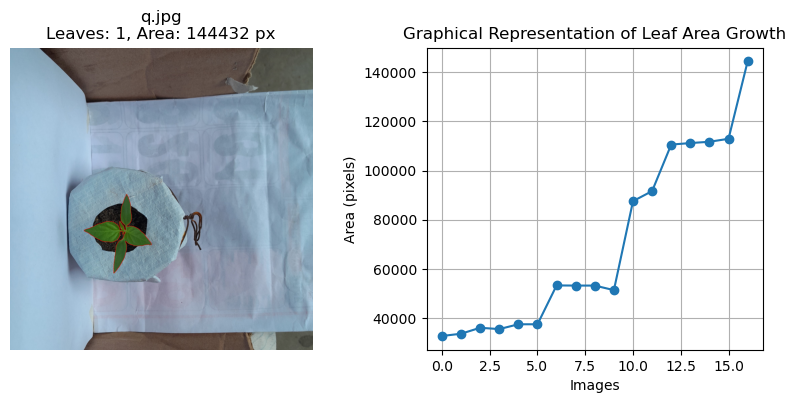

[18] Processed: r.jpg
  → Leaf count: 1
  → Total leaf area: 159686 pixels
  → Individual leaf areas:


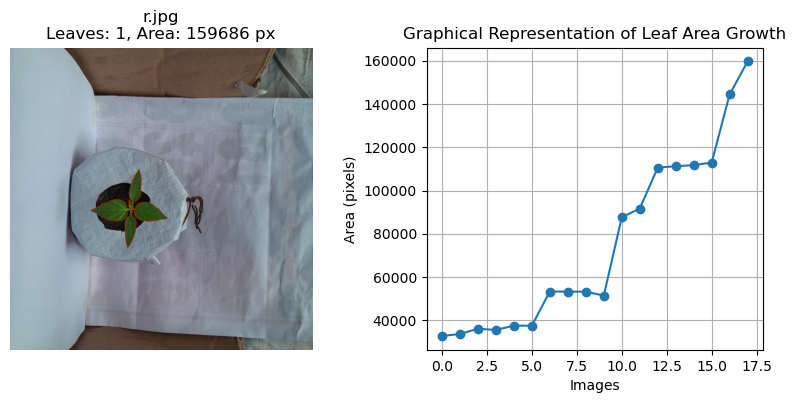

[19] Processed: s.jpg
  → Leaf count: 1
  → Total leaf area: 175729 pixels
  → Individual leaf areas:


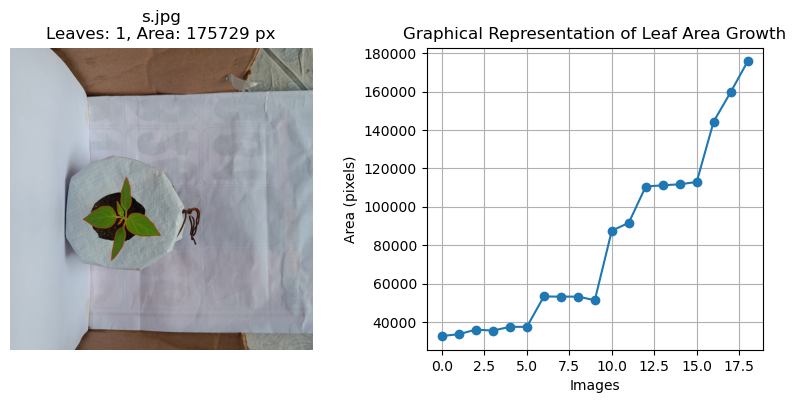

[20] Processed: t.jpg
  → Leaf count: 1
  → Total leaf area: 187992 pixels
  → Individual leaf areas:


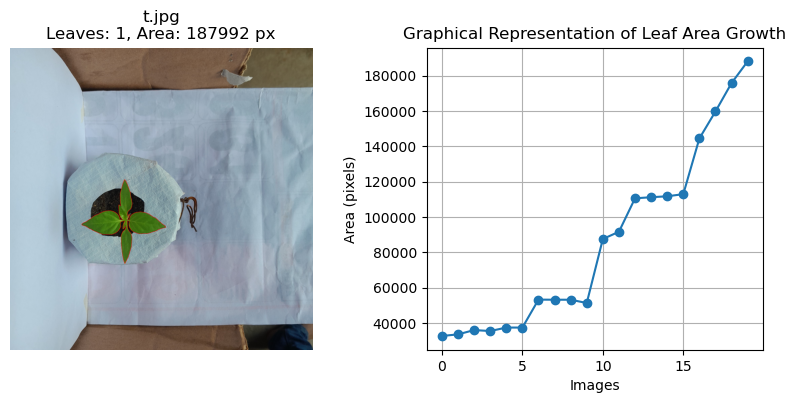

[21] Processed: u.jpg
  → Leaf count: 1
  → Total leaf area: 219688 pixels
  → Individual leaf areas:


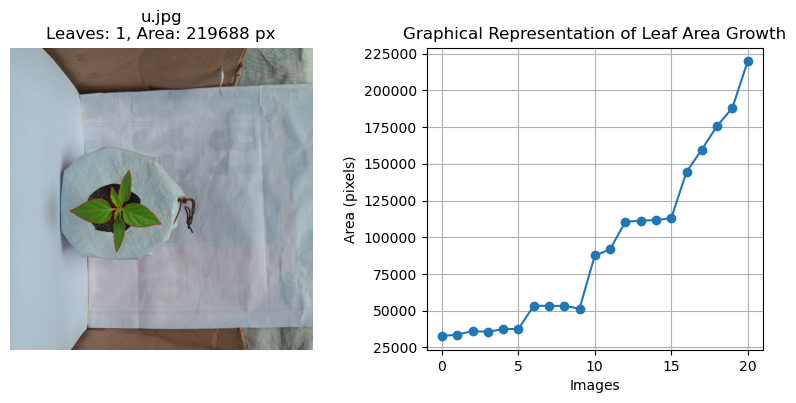

[22] Processed: v.jpg
  → Leaf count: 1
  → Total leaf area: 221486 pixels
  → Individual leaf areas:


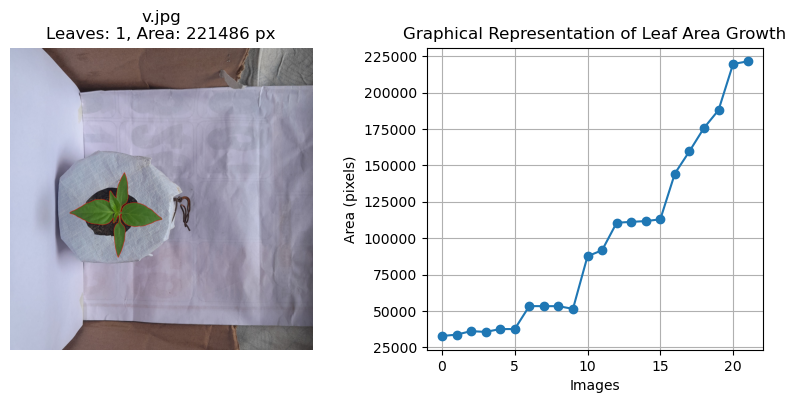

[23] Processed: w.jpg
  → Leaf count: 1
  → Total leaf area: 278575 pixels
  → Individual leaf areas:


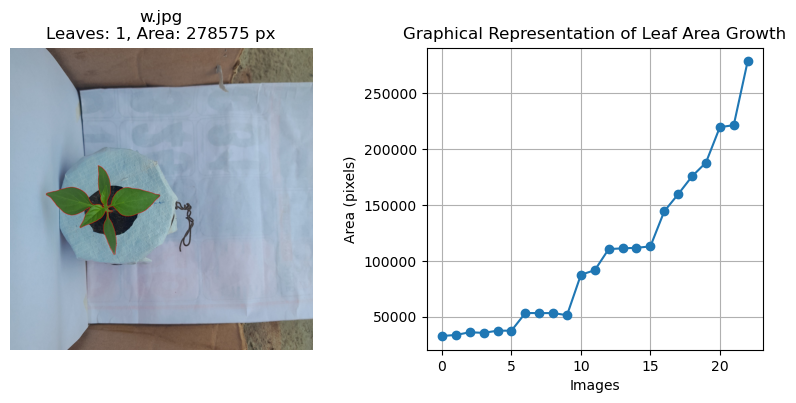

[24] Processed: x.jpg
  → Leaf count: 1
  → Total leaf area: 274830 pixels
  → Individual leaf areas:


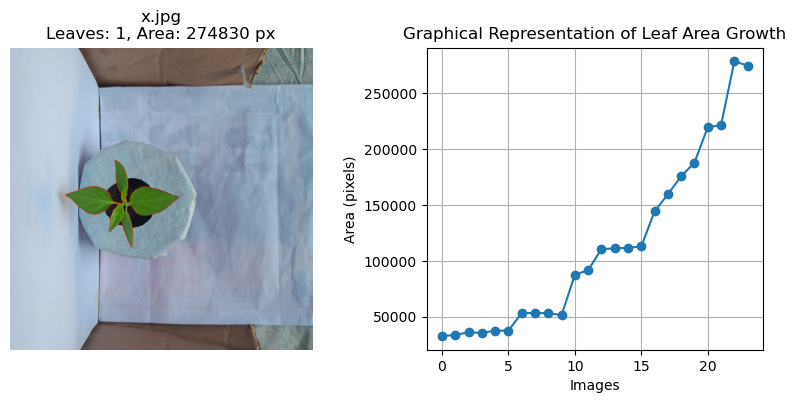

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

image_folder = "top_view_pics"  
valid_extensions = ('.jpg', '.jpeg', '.png') 
min_leaf_area = 100 
total_leaf_areas = []

image_files = [files for files in os.listdir(image_folder) if files.endswith(valid_extensions)]

for index, filename in enumerate((image_files), 1):
    image_path = os.path.join(image_folder, filename)
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image {filename}")
        continue

    # Apply Gaussian blur to reduce Gaussian noise
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0) 

    # Convert to HSV and create green mask
    hsv = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2HSV)
    lower_green = np.array([35, 50, 50])
    upper_green = np.array([85, 255, 255])
    green_mask = cv2.inRange(hsv, lower_green, upper_green)

    # Clean up the mask
    kernel = np.ones((3, 3), np.uint8)
    cleaned_mask = cv2.morphologyEx(green_mask, cv2.MORPH_OPEN, kernel, iterations=2)
    cleaned_mask = cv2.morphologyEx(cleaned_mask, cv2.MORPH_CLOSE, kernel, iterations=2)

    # Find contours
    contours, _ = cv2.findContours(cleaned_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    leaf_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_leaf_area]

    # Calculate metrics
    leaf_count = len(leaf_contours)
    total_leaf_area = sum(cv2.contourArea(cnt) for cnt in leaf_contours)
    total_leaf_areas.append(total_leaf_area)

    # Draw contours
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_with_green_leaves = image_rgb.copy()
    for cnt in leaf_contours:
        cv2.drawContours(img_with_green_leaves, [cnt], -1, (255, 0, 0), 2)
        

    print(f"[{index}] Processed: {filename}")
    print(f"  → Leaf count: {leaf_count}")
    print(f"  → Total leaf area: {int(total_leaf_area)} pixels")
    print("  → Individual leaf areas:")
            
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))

    # Plant image with contours and area annotations
    axs[0].imshow(img_with_green_leaves)
    axs[0].set_title(f"{filename}\nLeaves: {leaf_count}, Area: {int(total_leaf_area)} px")
    axs[0].axis('off')

    # Leaf area progression graph
    axs[1].plot(total_leaf_areas, marker='o', linestyle='-')
    axs[1].set_title("Graphical Representation of Leaf Area Growth")
    axs[1].set_xlabel("Images")
    axs[1].set_ylabel("Area (pixels)")
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()
